In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [5]:
df = pd.read_csv("C:/Users/DSC-GDP075/Desktop/the new phase/week5&6 and capston/results data/Diabetic Retinopathy.csv")
df.head(10)      

,Diabetic Retinopathy Patients,Total
0,Unspecified diabetes mellitus with background ...,466
1,"Mild Non-Proliferative Diabetic Retinopathy, T...",73
2,Moderate Non-Proliferative Diabetic Retinopath...,68
3,Moderate Non-Proliferative Diabetic Retinopath...,58
4,Type 2 diabetes mellitus with background retin...,25
5,"Mild Non-Proliferative Diabetic Retinopathy, U...",32
6,Type 1 diabetes mellitus with background retin...,5
7,Moderate Non-Proliferative Diabetic Retinopath...,4
8,"Mild Non-Proliferative Diabetic Retinopathy, T...",5


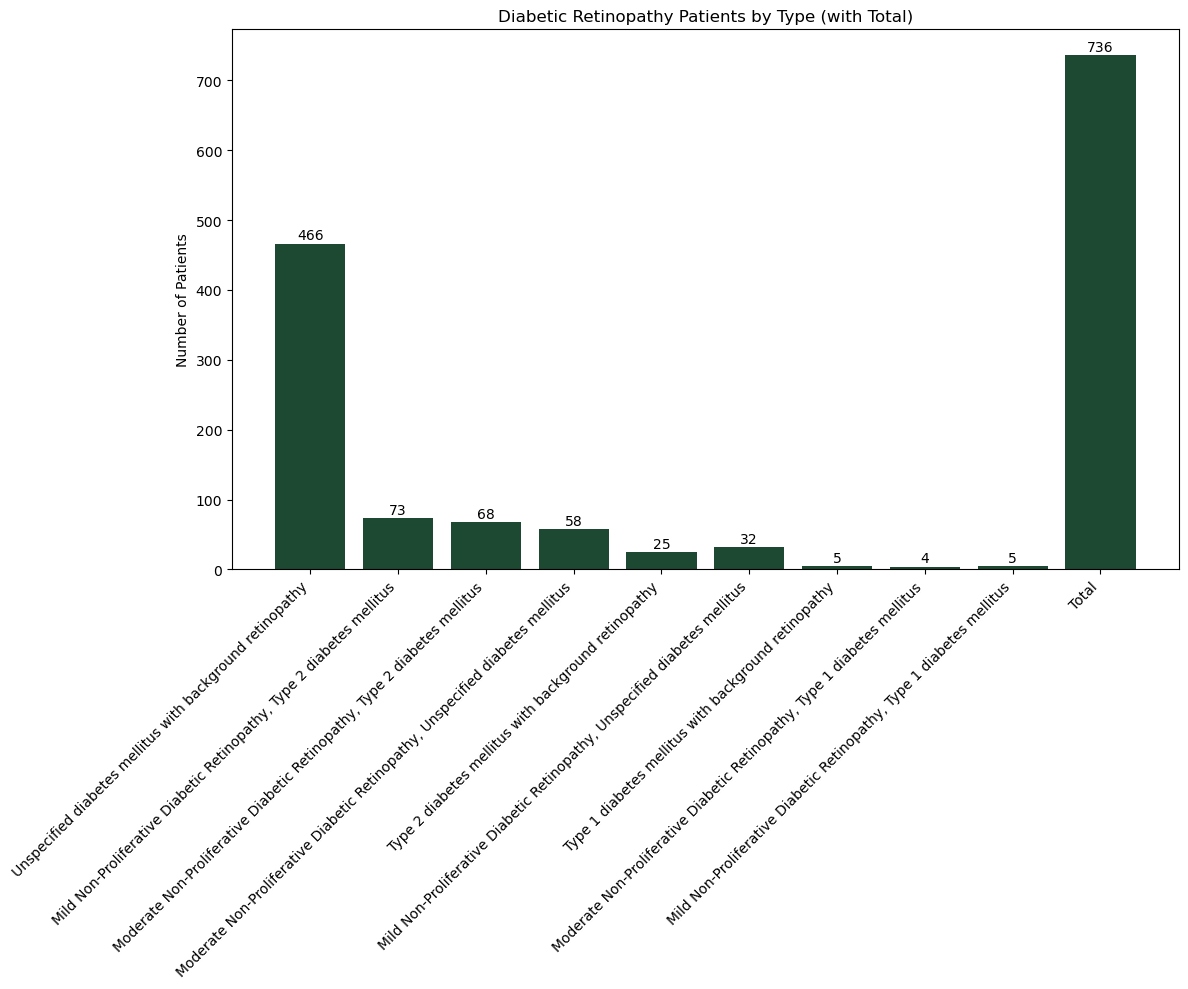

In [7]:
total_sum = df["Total"].sum()
df_total = pd.DataFrame({
    "Diabetic Retinopathy Patients": ["Total"],
    "Total": [total_sum]
})
df_plot = pd.concat([df, df_total], ignore_index=True)

# --- Plot ---
plt.figure(figsize=(12,10))
bars = plt.bar(df_plot["Diabetic Retinopathy Patients"], df_plot["Total"], color="#1D4831")

plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of Patients")
plt.title("Diabetic Retinopathy Patients by Type (with Total)")

# Add labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [14]:
dff = pd.read_csv("C:/Users/DSC-GDP075/Desktop/the new phase/week5&6 and capston/results data/Laboratory Investigations and Number of  Radiology & Physiotherapy patients in the last Five Years.csv")

In [15]:
import pandas as pd

dff = dff.iloc[:, :8]  

dff.columns = ["Activity", "2017", "2018", "2019", "2020", "2021", "2022", "2023"]

# Drop empty rows
dff = dff.dropna(subset=["Activity"])

# Remove commas and convert to integers
for col in ["2017","2018","2019","2020","2021","2022","2023"]:
    dff[col] = dff[col].astype(str).str.replace(",", "").astype(int)

# Drop the first row (original header)
dff = dff.drop(0)

# Reset index
dff = dff.reset_index(drop=True)

# Convert numbers to integers (already done)
for col in ["2017","2018","2019","2020","2021","2022","2023"]:
    dff[col] = dff[col].astype(int) 
    
dff

,Activity,2017,2018,2019,2020,2021,2022,2023
0,Laboratory Investigations,152823467,171955903,178613513,169418188,186386454,188021504,220908227
1,No. of Radiology Cases,6916016,7774283,8141097,6461305,8055497,8179282,9146844
2,No. of Medical Rehabilitation Cases,1147548,1584863,1688597,973684,1525453,1729972,1672965


In [16]:
# Total per activity across all years
dff["Total_2017_2023"] = dff[["2017","2018","2019","2020","2021","2022","2023"]].sum(axis=1)
print("Total per Activity (2017-2023):")
print(dff[["Activity","Total_2017_2023"]])

# Total per year across all activities
yearly_total = dff[["2017","2018","2019","2020","2021","2022","2023"]].sum()
print("\nTotal per Year (all activities combined):")
print(yearly_total)

# Yearly growth rate per activity (%)
growth = dff[["2017","2018","2019","2020","2021","2022","2023"]].pct_change(axis=1)*100
growth.insert(0, "Activity", dff["Activity"])
print("\nYear-over-Year Growth Rate (%):")
print(growth)

Total per Activity (2017-2023):
                              Activity  Total_2017_2023
0            Laboratory Investigations       1268127256
1               No. of Radiology Cases         54674324
2  No. of Medical Rehabilitation Cases         10323082

Total per Year (all activities combined):
2017    160887031
2018    181315049
2019    188443207
2020    176853177
2021    195967404
2022    197930758
2023    231728036
dtype: int64

Year-over-Year Growth Rate (%):
                              Activity  2017       2018      2019       2020  \
0            Laboratory Investigations   NaN  12.519305  3.871696  -5.148169   
1               No. of Radiology Cases   NaN  12.409847  4.718300 -20.633485   
2  No. of Medical Rehabilitation Cases   NaN  38.108646  6.545298 -42.337692   

        2021       2022       2023  
0  10.015611   0.877236  17.490937  
1  24.672911   1.536653  11.829425  
2  56.668180  13.407099  -3.295256  


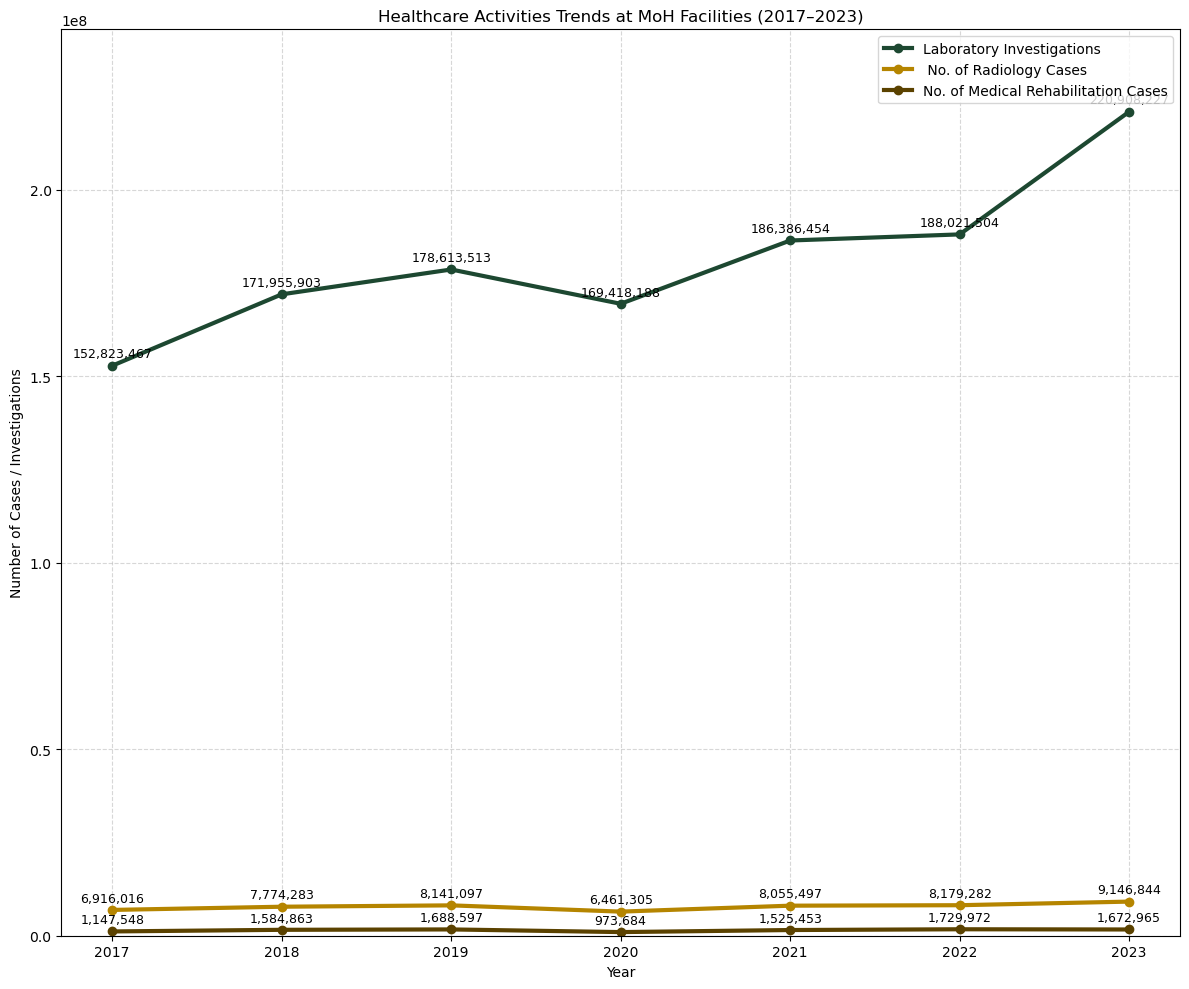

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
years = ["2017","2018","2019","2020","2021","2022","2023"]
colors = ['#1D4831', '#B58500', '#5B4200']

for activity, color in zip(dff["Activity"], colors):
    plt.plot(years, dff.loc[dff["Activity"]==activity, years].values.flatten(),marker="o", label=activity, color=color, linewidth=3)

plt.title("Healthcare Activities Trends at MoH Facilities (2017–2023)")
plt.xlabel("Year")
plt.ylabel("Number of Cases / Investigations")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.ylim(0, dff[years].values.max()*1.1)

# Add value labels
for activity, color in zip(dff["Activity"], colors):
    y_vals = dff.loc[dff["Activity"]==activity, years].values.flatten()
    for x, y in zip(years, y_vals):
        plt.text(x, y + dff[years].values.max()*0.01, f"{y:,}", ha="center", fontsize=9)

plt.tight_layout()
plt.show()

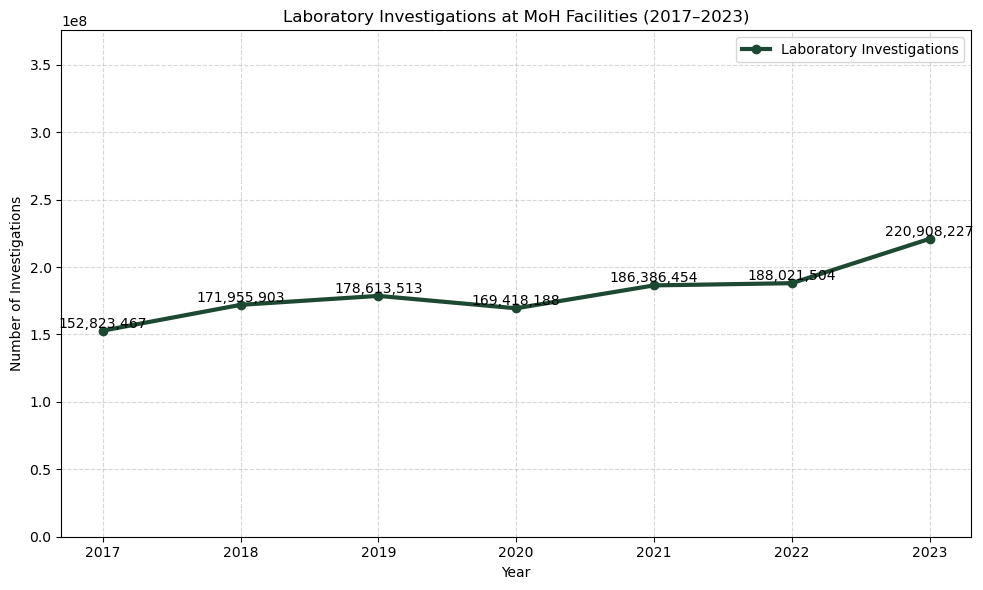

In [18]:
lab_df = dff[dff["Activity"] == "Laboratory Investigations"].copy()

# Convert numbers to int (if not already)
for col in ["2017","2018","2019","2020","2021","2022","2023"]:
    lab_df[col] = lab_df[col].astype(int)

plt.figure(figsize=(10,6))
years = ["2017","2018","2019","2020","2021","2022","2023"]
values = lab_df[years].values.flatten()


plt.plot(years, values, marker='o', linewidth=3, color="#1D4831", label="Laboratory Investigations")
plt.title("Laboratory Investigations at MoH Facilities (2017–2023)")
plt.xlabel("Year")
plt.ylabel("Number of Investigations")
plt.ylim(0, max(values)*1.7)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()

# Add data labels
for x, y in zip(years, values):
    plt.text(x, y + max(values)*0.01, f"{y:,}", ha='center')

plt.tight_layout()
plt.show()